# Project1: Road Traffic Severity Classification¶
## Objective
## Data


## Loading necessary libraries and datasets
- NumPy: A library for numerical operations in Python.
- Pandas: A powerful library for data manipulation and analysis.
- Matplotlib: A library for creating static, interactive, and animated visualizations in Python.
- Seaborn: A data visualization library based on Matplotlib for making attractive and informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="dark")
sns.set_palette("dark")


# Suppresssing non-critical warnings to maintain clean and uncluttered output for better readability.
import warnings
warnings.filterwarnings('ignore')

# Display all columns without truncation
pd.set_option('display.max_columns', None)

## Reading in the Dataset

In [2]:
df = pd.read_csv('Datasets\RTA Dataset.csv')

## Exploratory Descriptive Analysis(EDA)

### Basic Data Inspection

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9541,18:23:00,Friday,18-30,Male,Above high school,Owner,5-10yr,Lorry (41?100Q),Owner,Unknown,No defect,Office areas,Double carriageway (median),Tangent road with mild grade and flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Pedestrian,Female,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the left,Slight Injury
409,12:30:00,Thursday,18-30,Unknown,Junior high school,Employee,2-5yr,Pick up upto 10Q,Owner,Unknown,NaN,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Earth roads,Wet or damp,Daylight,Normal,Rollover,1,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
10856,12:30:00,Sunday,18-30,Male,Junior high school,Employee,1-2yr,Other,Owner,Above 10yr,NaN,Residential areas,Undivided Two way,Tangent road with flat terrain,NaN,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving to the left,Serious Injury
10833,16:35:00,Saturday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,NaN,Asphalt roads,Wet or damp,Darkness - lights lit,Unknown,Collision with roadside objects,2,1,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
7090,8:45:00,Monday,Under 18,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,NaN,Church areas,Two-way (divided with broken lines road marking),Steep grade downward with mountainous terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overloading,Slight Injury


In [6]:
print(f"Dimensions of dataframe: {df.shape}")

Dimensions of dataframe: (12316, 32)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
int64_columns = [column for column in df.columns if df[column].dtype == 'int64']
result = ",".join(int64_columns)
print(f"Number of Numerical variables: {len(int64_columns)}")
print(f"Numerical Columns: {result}\n")

object_columns = [column for column in df.columns if df[column].dtype == 'object']
result = ",".join(object_columns)
print(f"Number of Categorical variables: {len(object_columns)}")
print(f"Categorical Columns: {result}")

Number of Numerical variables: 2
Numerical Columns: Number_of_vehicles_involved,Number_of_casualties

Number of Categorical variables: 30
Categorical Columns: Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


### Descriptive statistics

In [9]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [10]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


### Exploring Target Variable

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity', ylabel='count'>

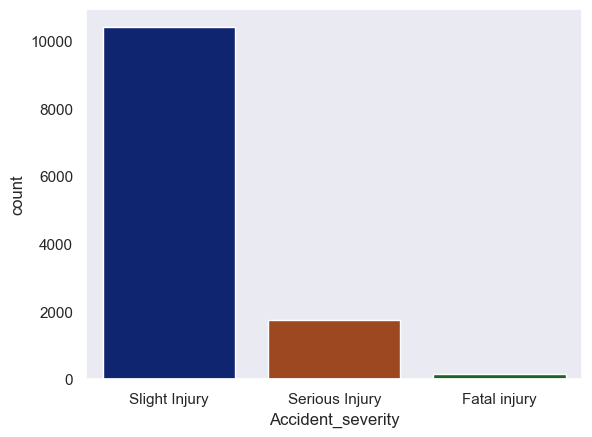

In [11]:
print(df['Accident_severity'].value_counts())
sns.countplot(data=df, x='Accident_severity')

Shows that the dataset is **Unbalanced**

### Duplicate Values

In [12]:
df.duplicated().sum()

0

### Missing Values

In [13]:
# Function prints the number of missing value and percentage of missing values for each column having atleast one missing value
def missing_values_table(df):
        
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


### Unique Values

In [14]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [15]:
# Function to print unique values in DataFrame columns with at most max_unique_values unique values.
def unique_values_per_column(dataframe, max_unique_values):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        
        if len(unique_values) <= max_unique_values:
            print(f"Column: {column}")
            print(f"Number of Unique values: {len(unique_values)}")
            print(f"Unique values: {', '.join(map(str, unique_values))}\n")
            
unique_values_per_column(df,20)

Column: Day_of_week
Number of Unique values: 7
Unique values: Monday, Sunday, Friday, Wednesday, Saturday, Thursday, Tuesday

Column: Age_band_of_driver
Number of Unique values: 5
Unique values: 18-30, 31-50, Under 18, Over 51, Unknown

Column: Sex_of_driver
Number of Unique values: 3
Unique values: Male, Female, Unknown

Column: Educational_level
Number of Unique values: 8
Unique values: Above high school, Junior high school, nan, Elementary school, High school, Unknown, Illiterate, Writing & reading

Column: Vehicle_driver_relation
Number of Unique values: 5
Unique values: Employee, Unknown, Owner, nan, Other

Column: Driving_experience
Number of Unique values: 8
Unique values: 1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Licence, Below 1yr, unknown

Column: Type_of_vehicle
Number of Unique values: 18
Unique values: Automobile, Public (> 45 seats), Lorry (41?100Q), nan, Public (13?45 seats), Lorry (11?40Q), Long lorry, Public (12 seats), Taxi, Pick up upto 10Q, Stationwagen, Ridden hors

- Column: Fitness_of_casuality has one category as NormalNormal which is same as Normal
- In many columns, we can see a values like 'na','Unknown' and 'unknown' 


In [18]:
for column in df.columns:
    print(df[column].value_counts().sort_values(ascending=False))
    print("\n")

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
10:59:00      1
21:36:00      1
16:27:00      1
23:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64


Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64


Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64


Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64


Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64


Driving_experience
5-10yr      

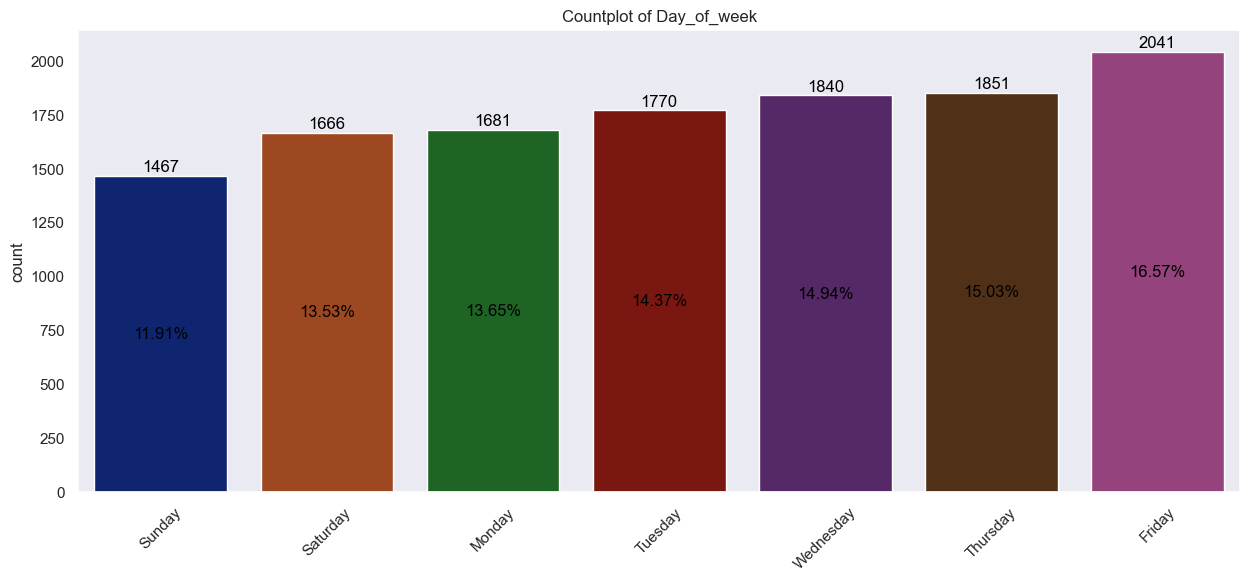

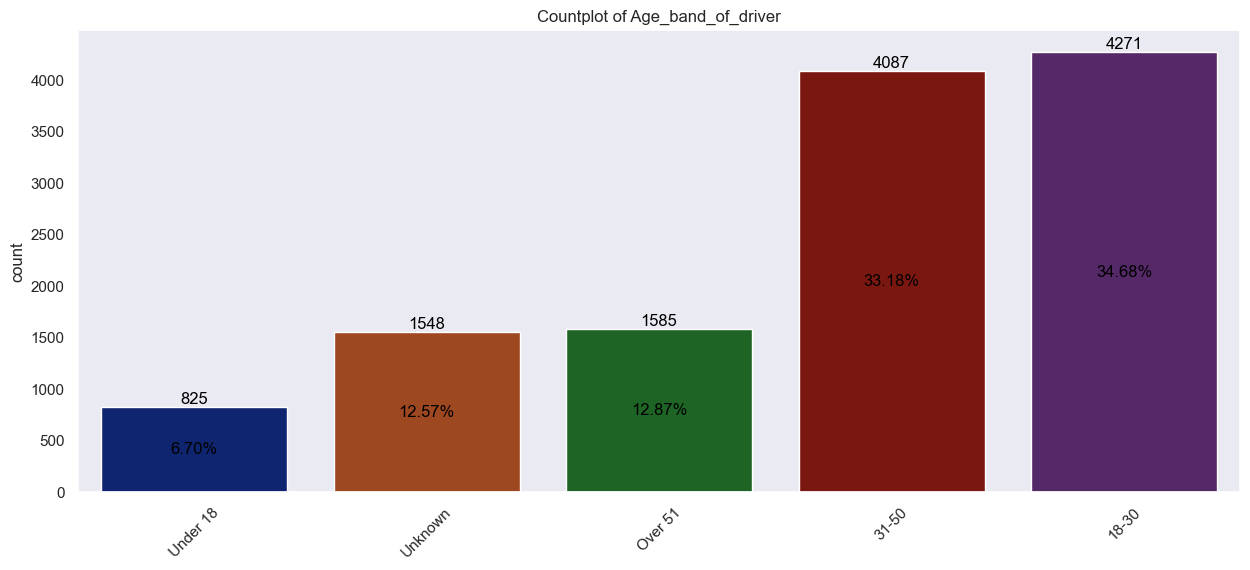

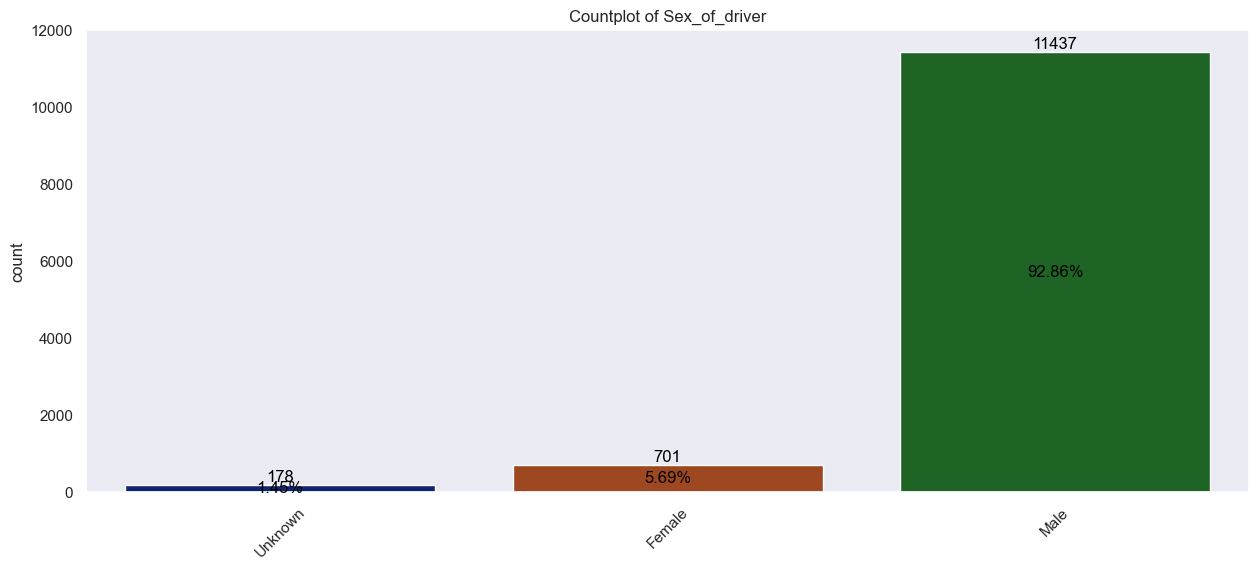

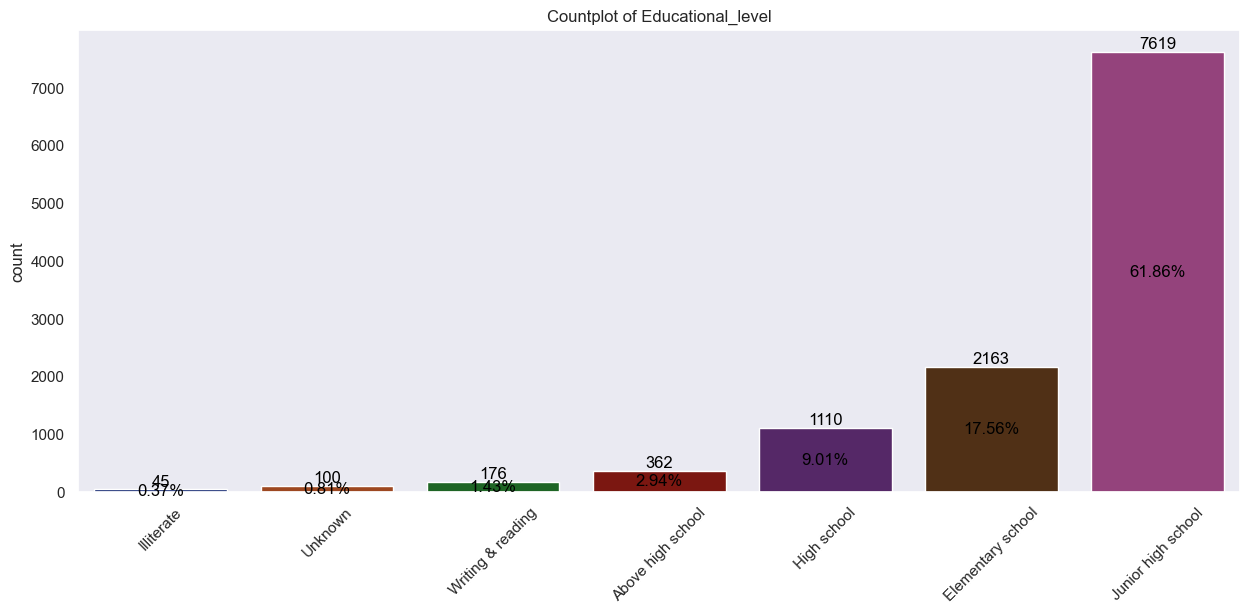

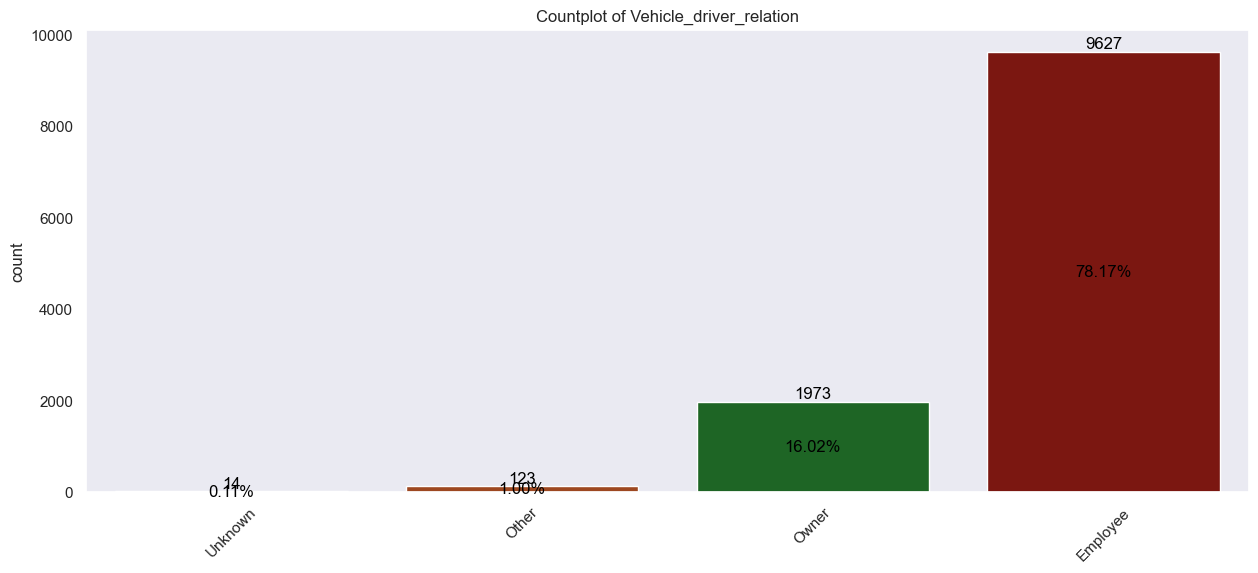

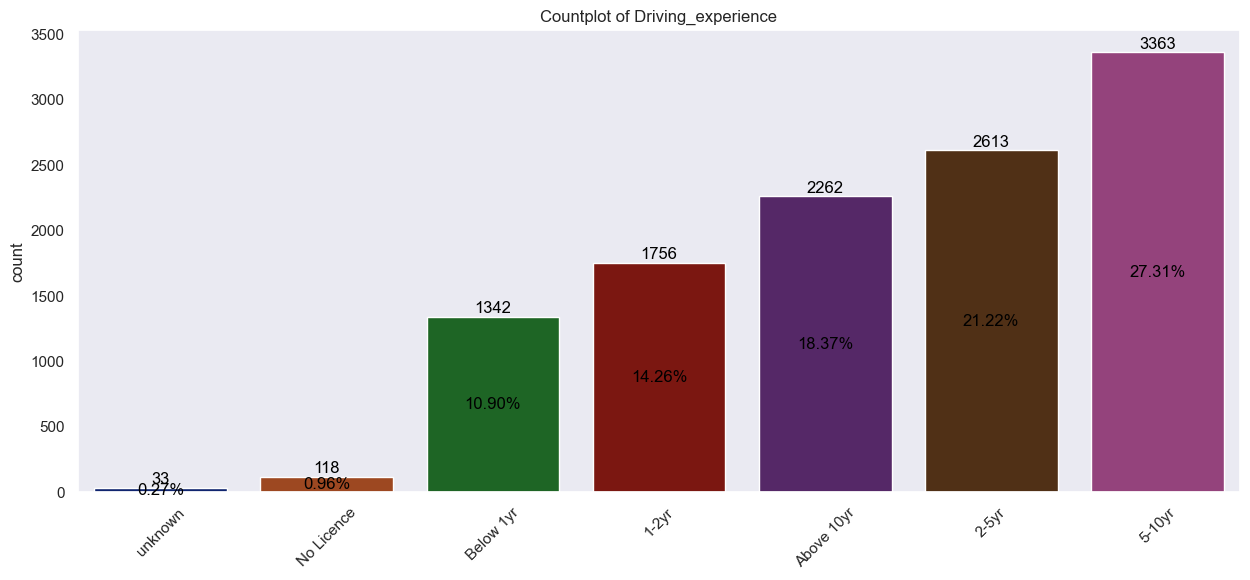

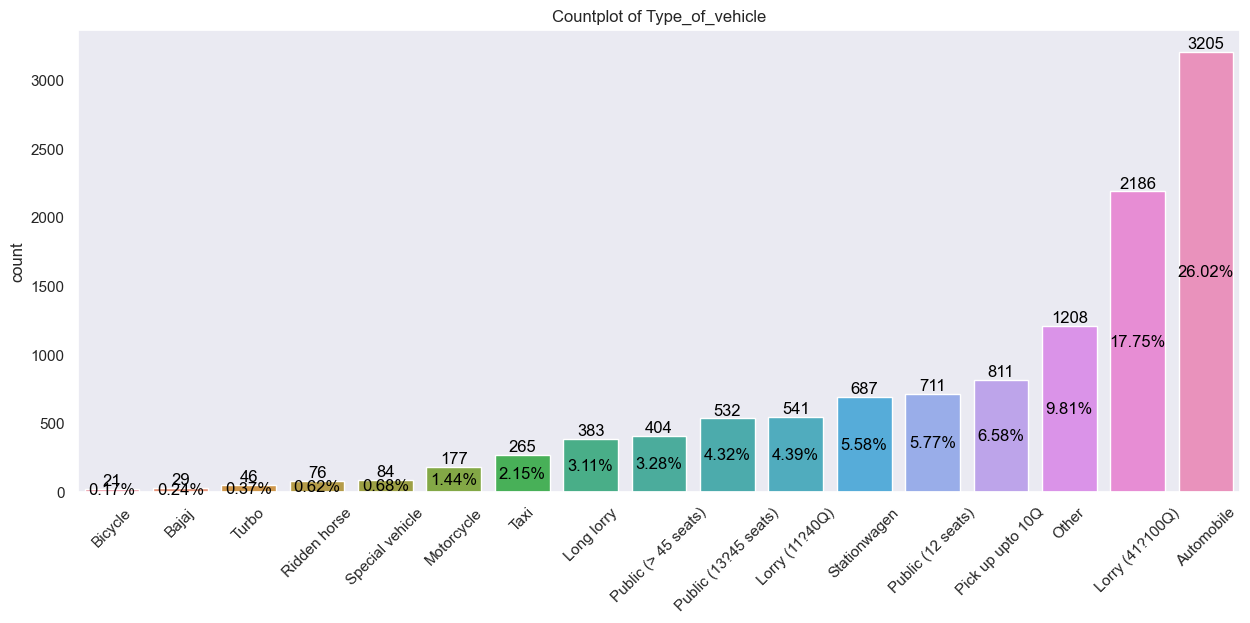

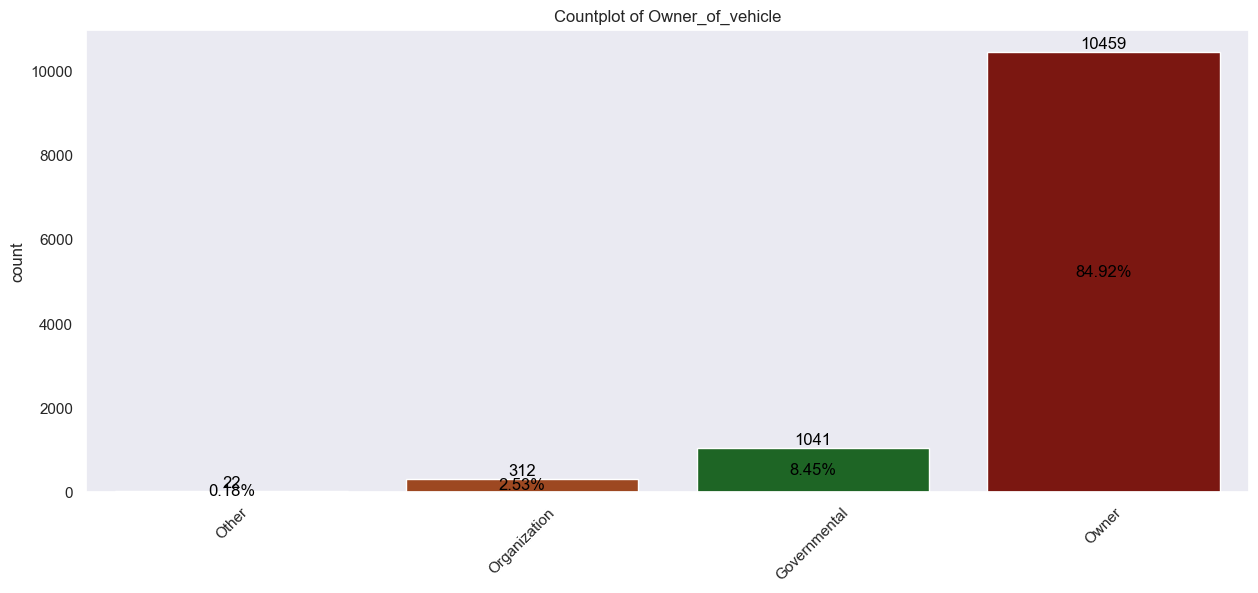

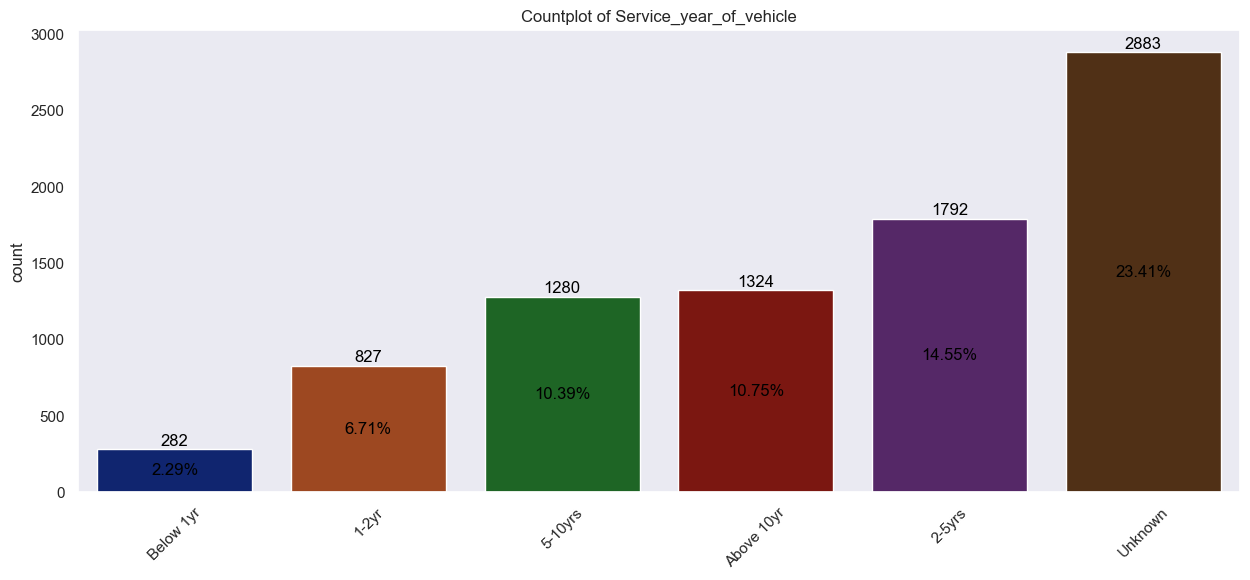

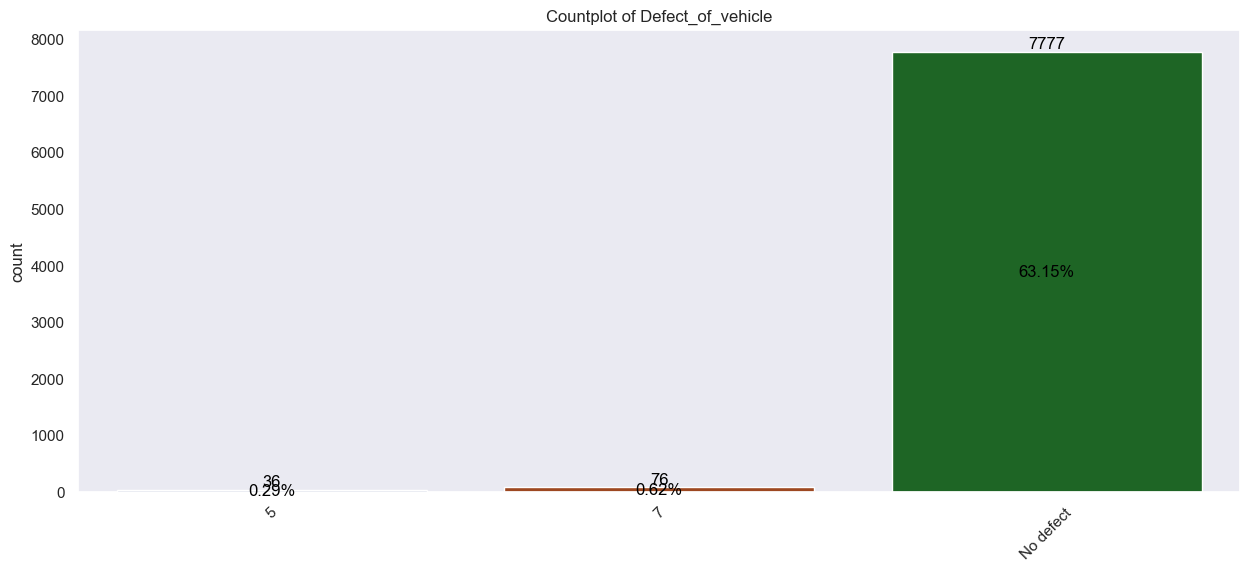

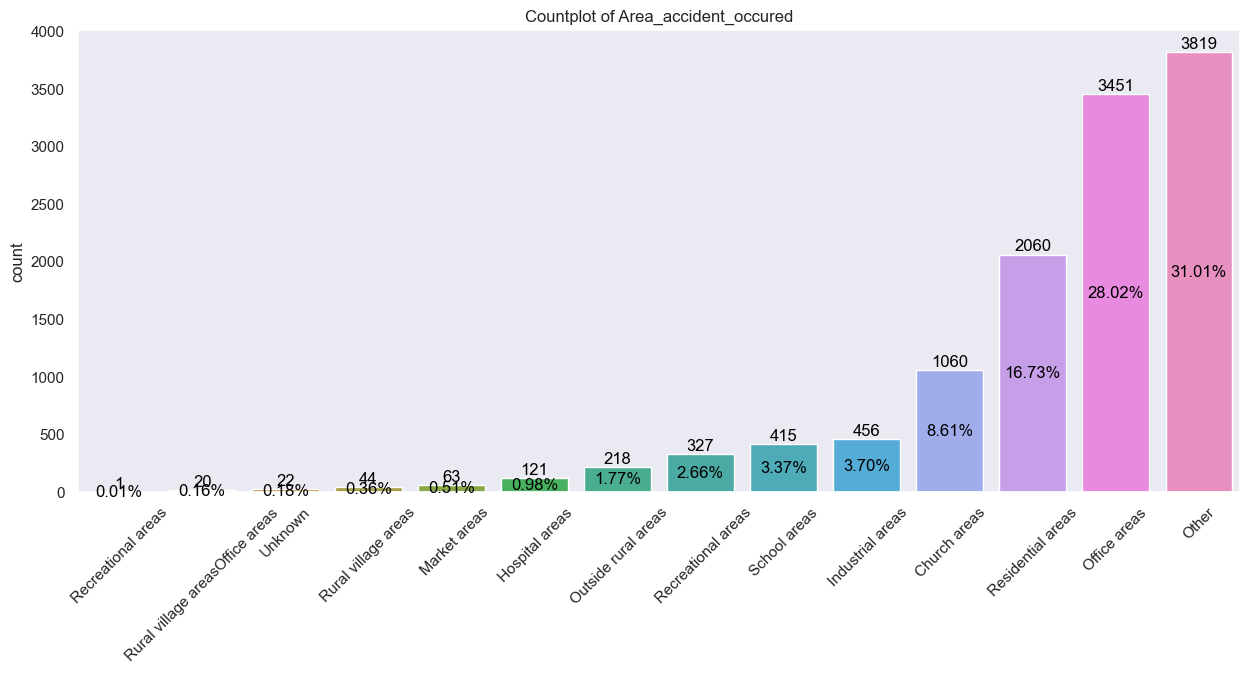

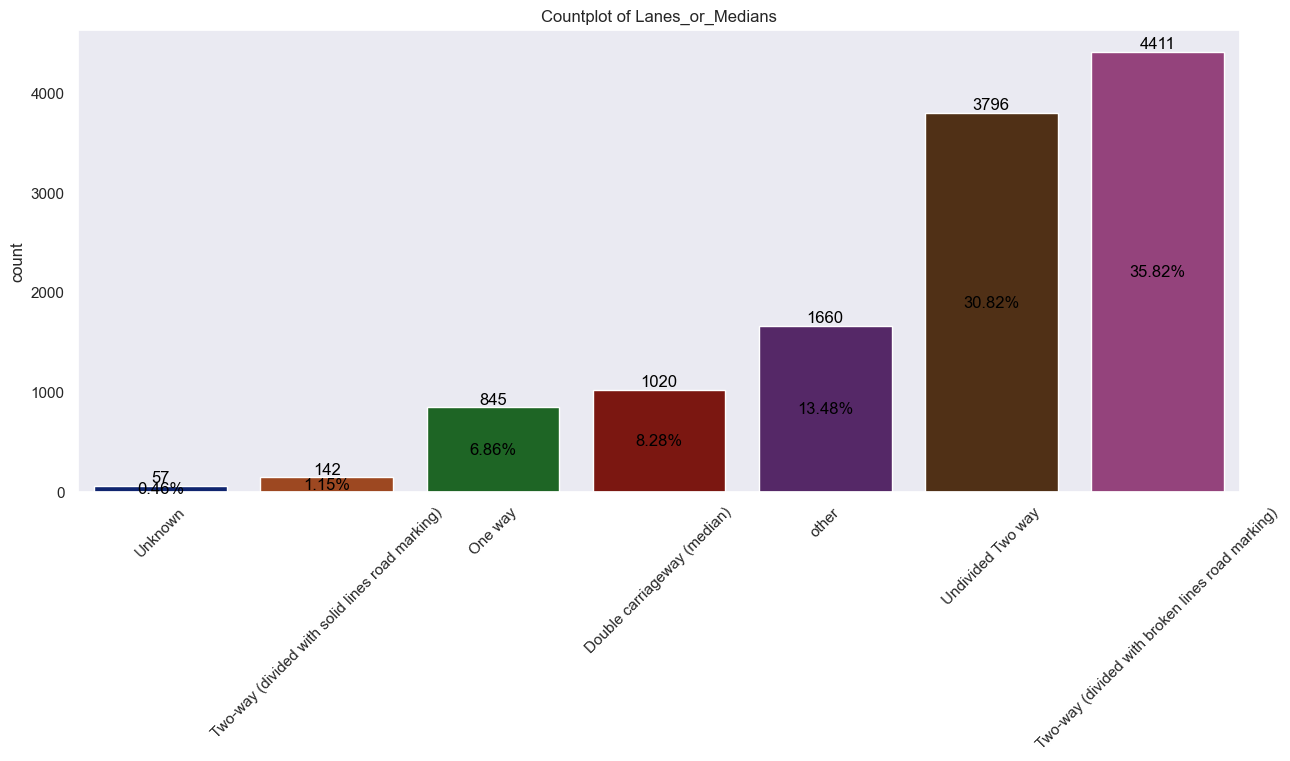

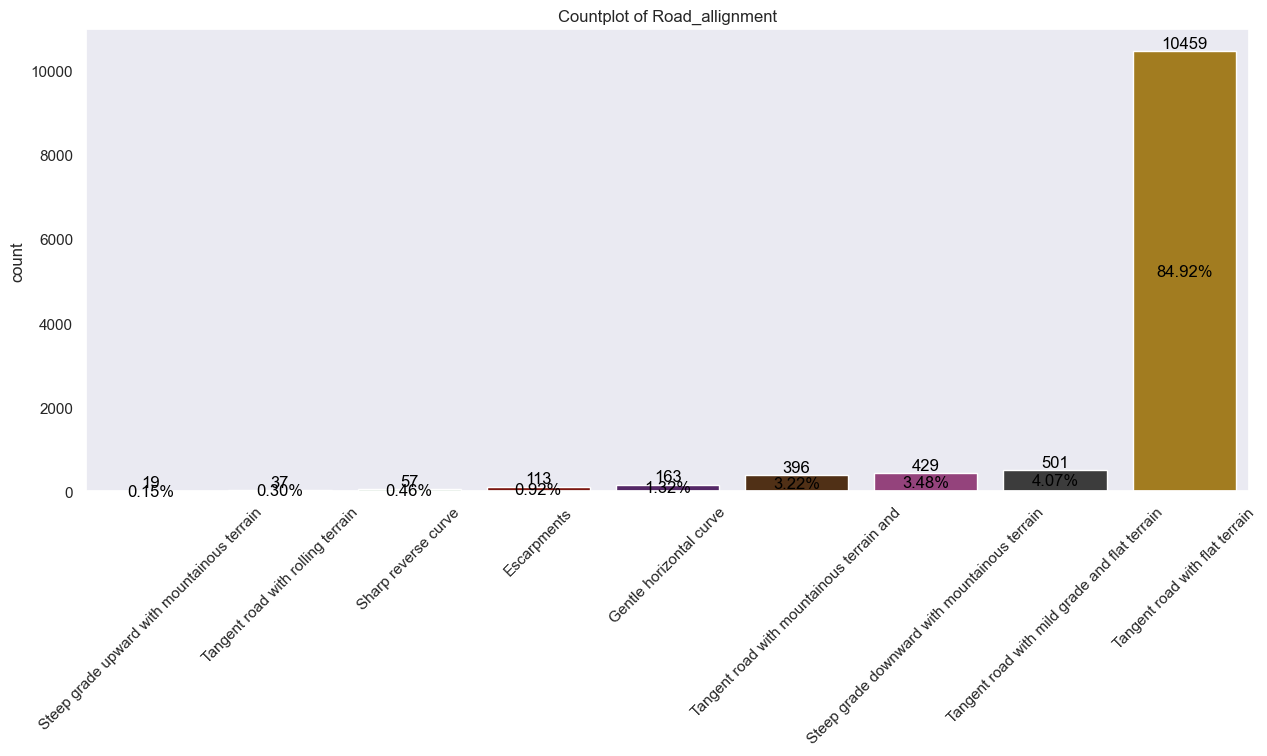

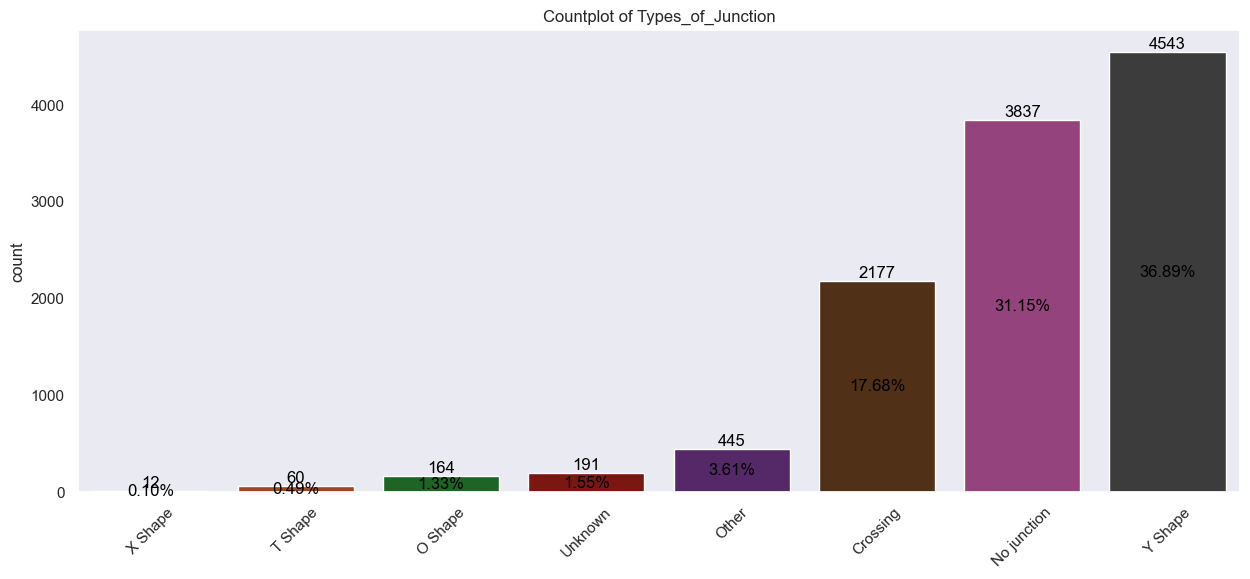

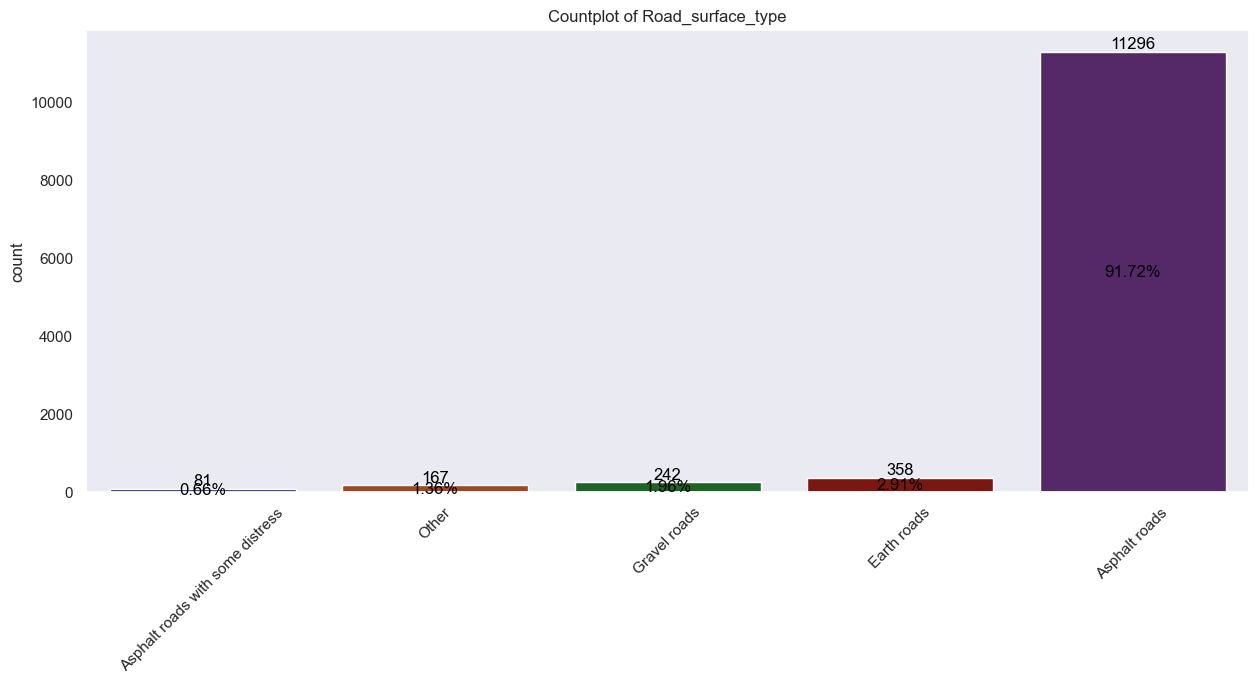

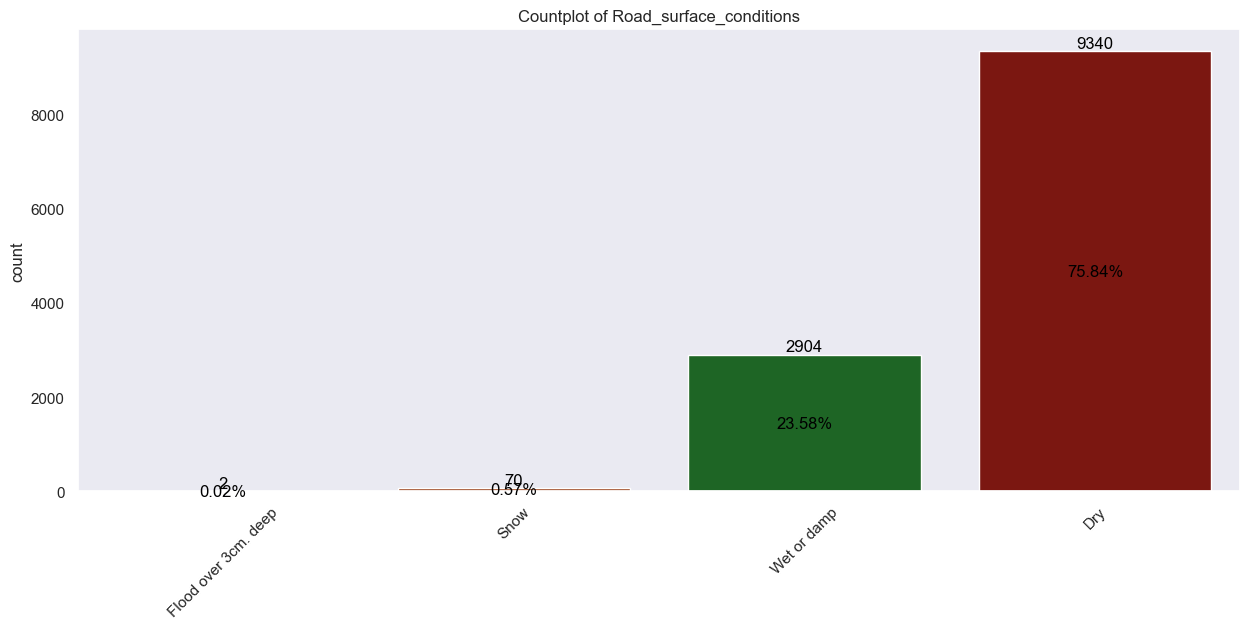

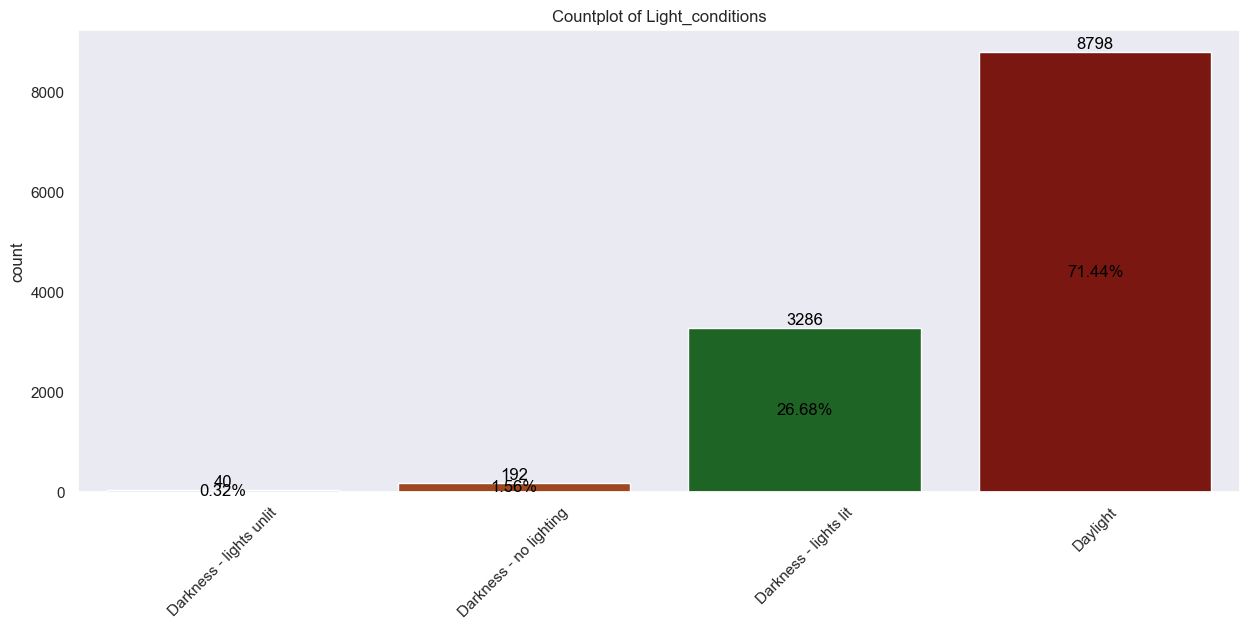

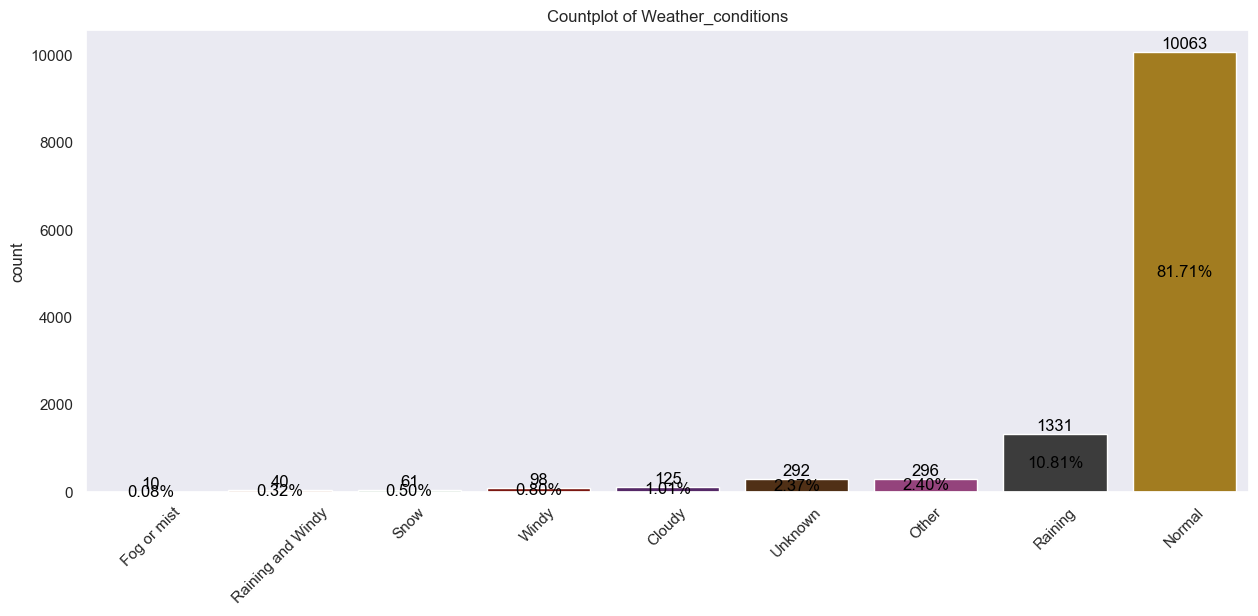

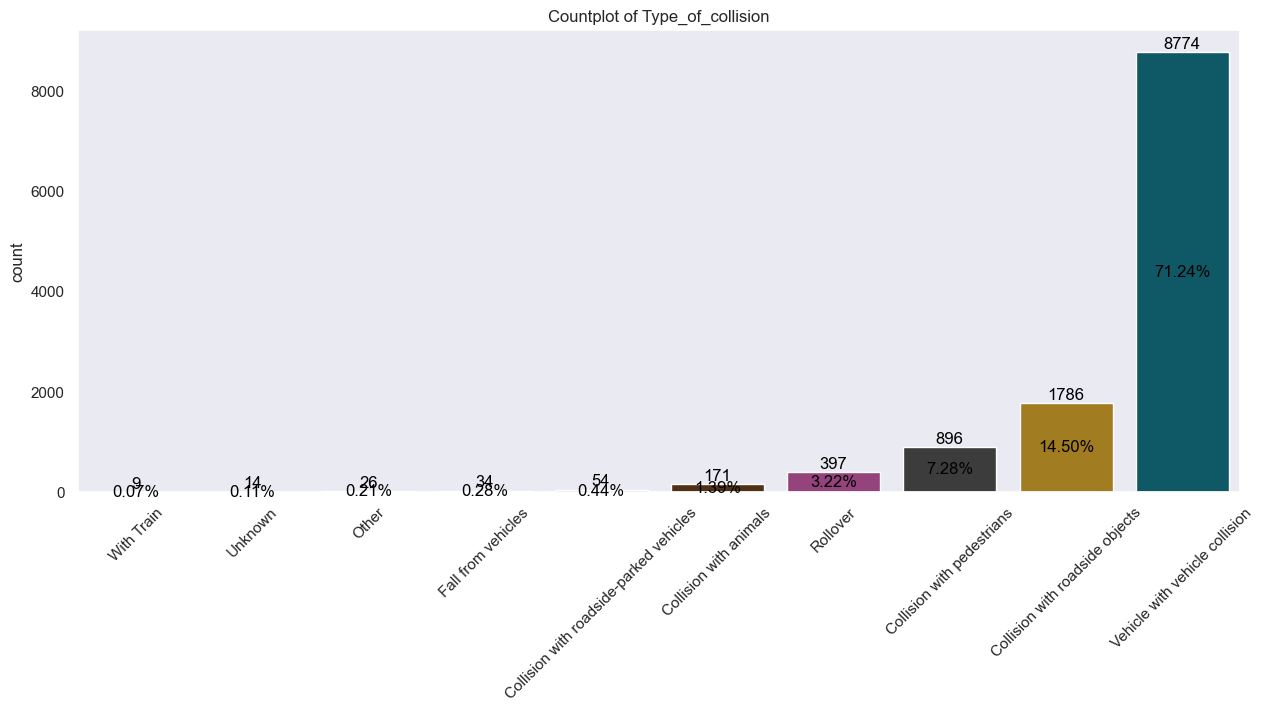

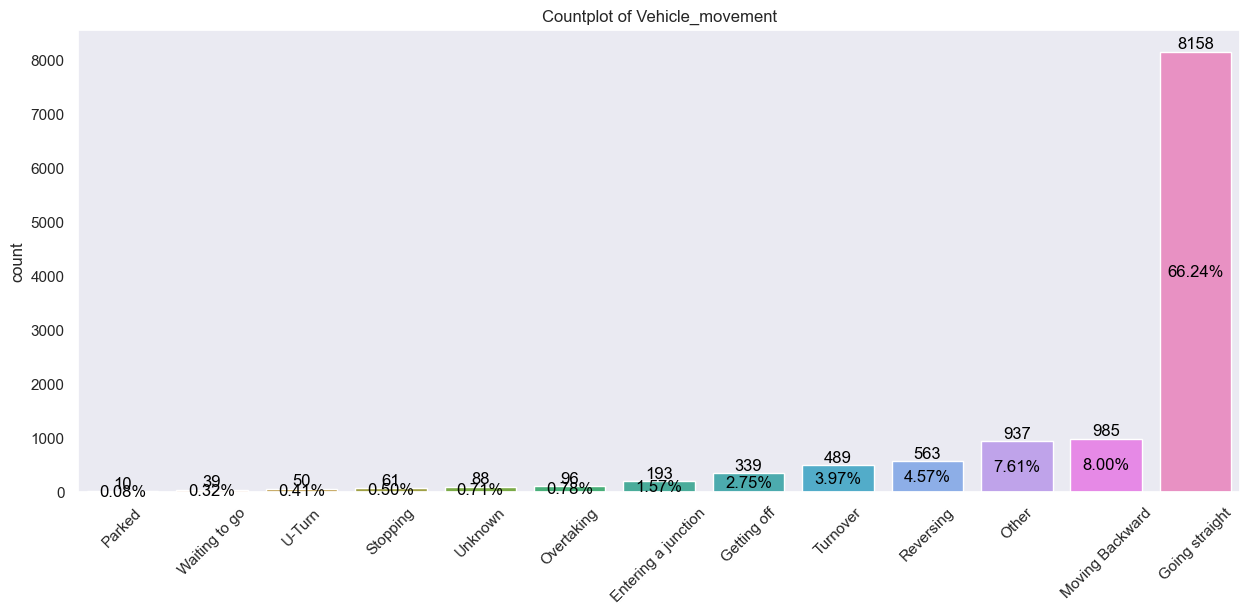

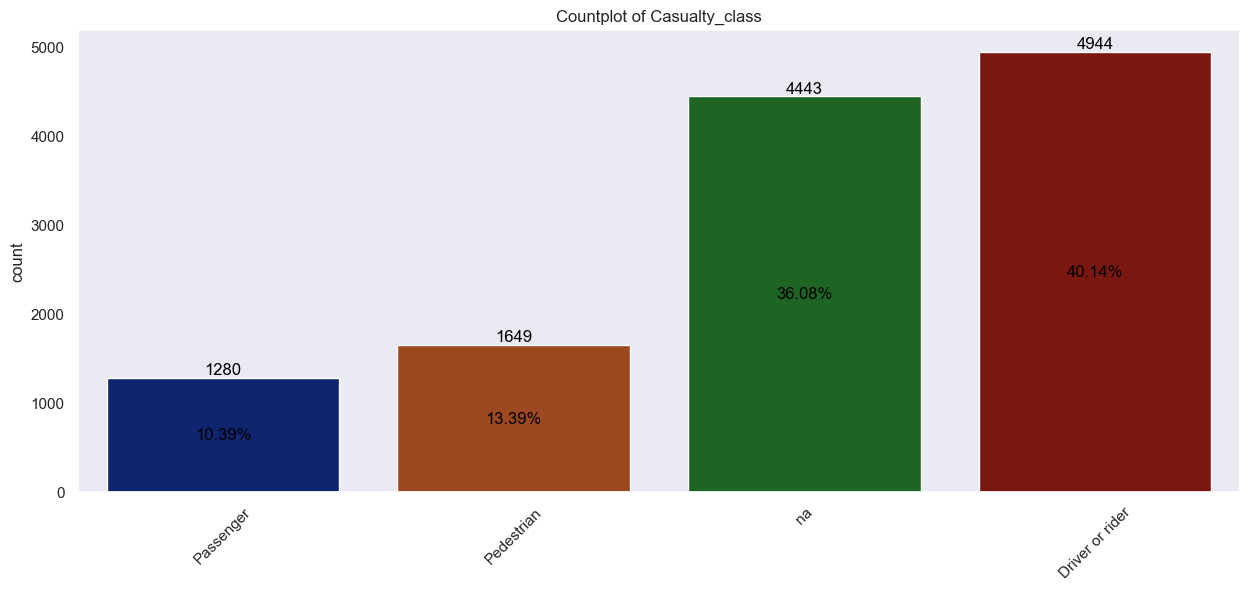

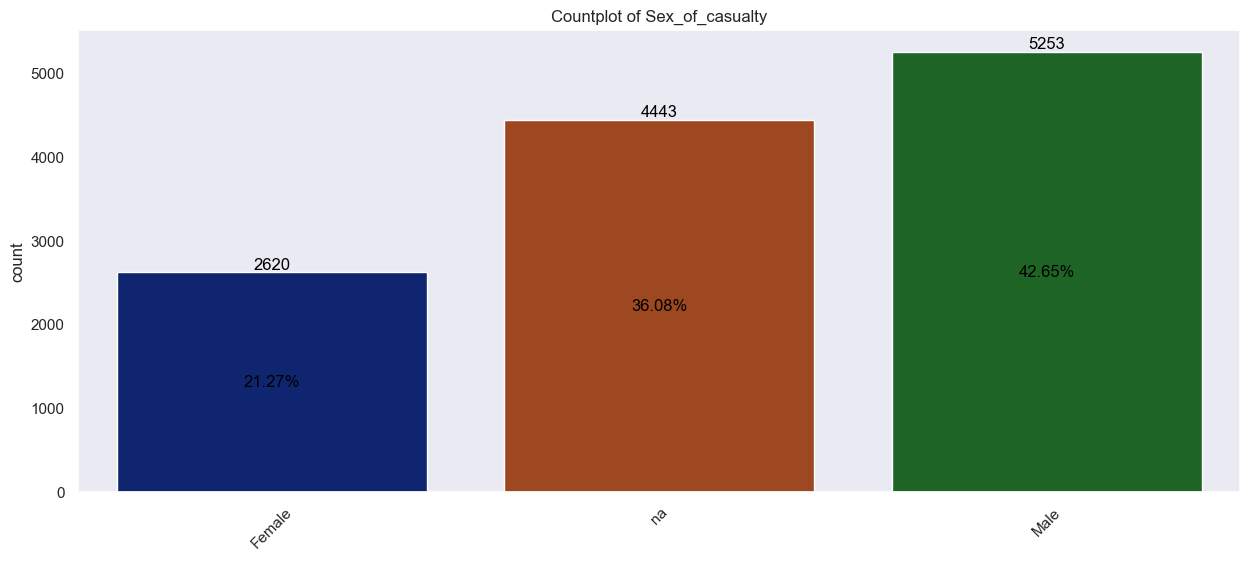

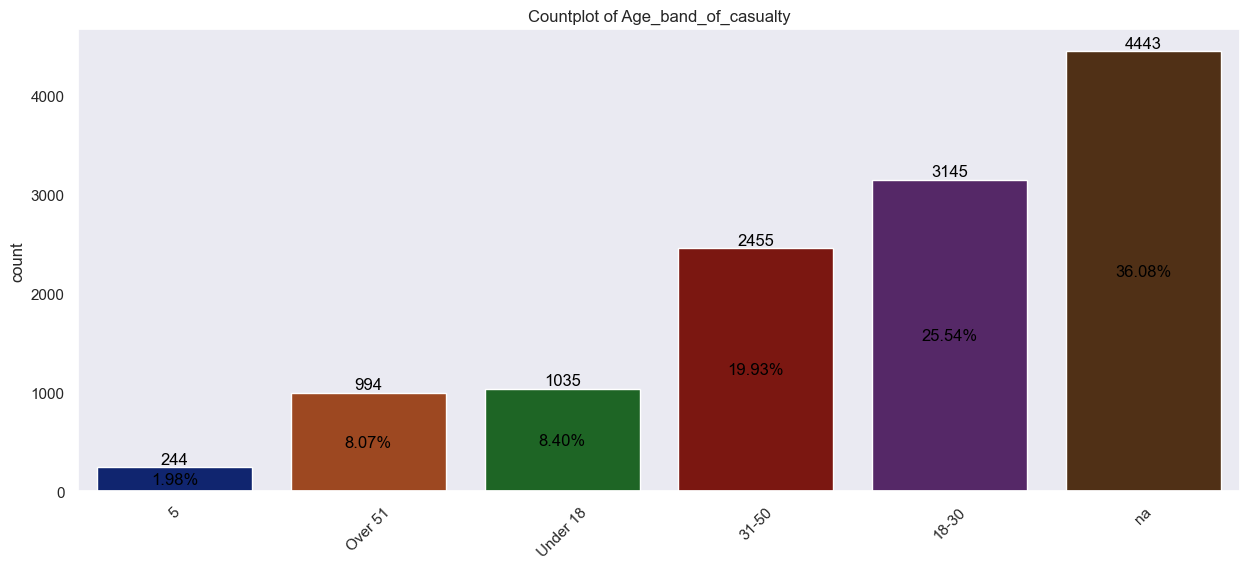

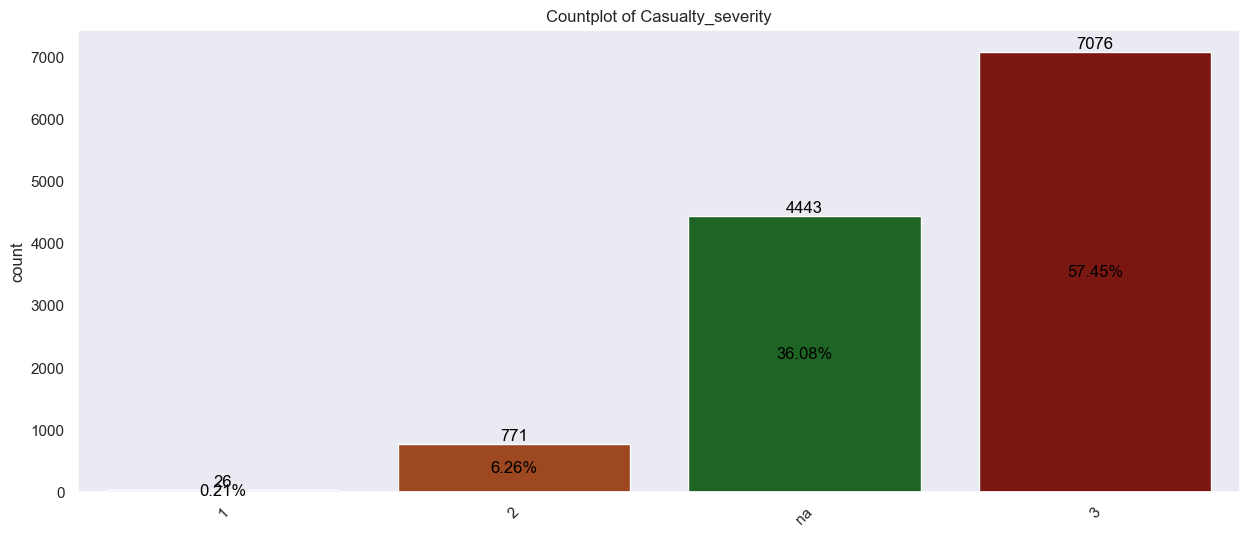

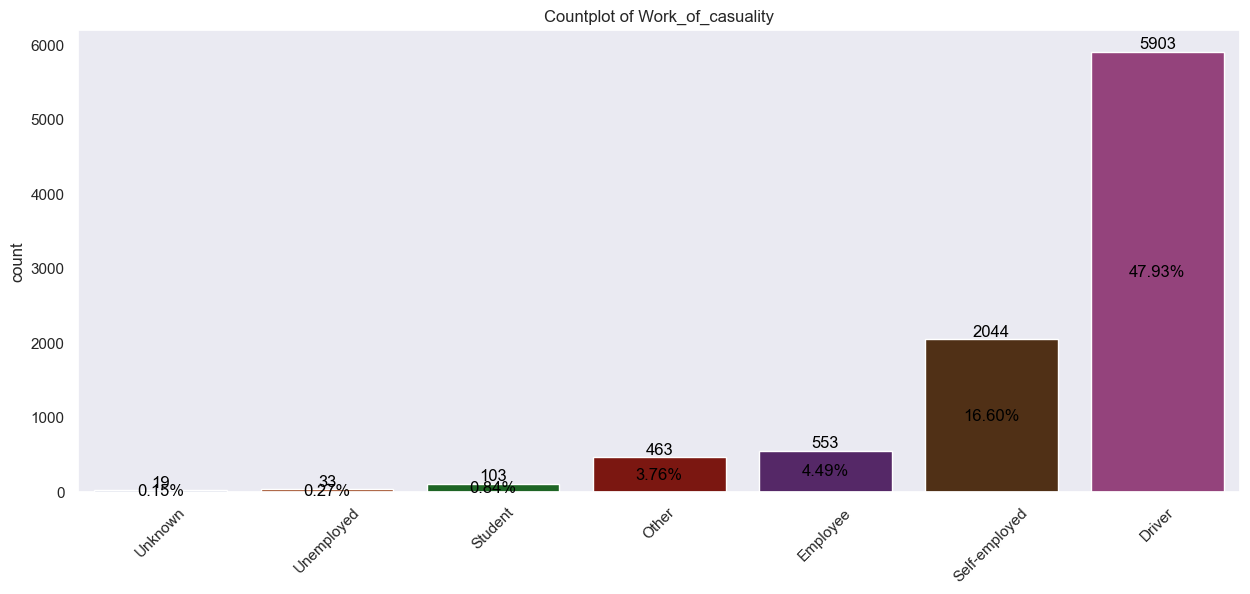

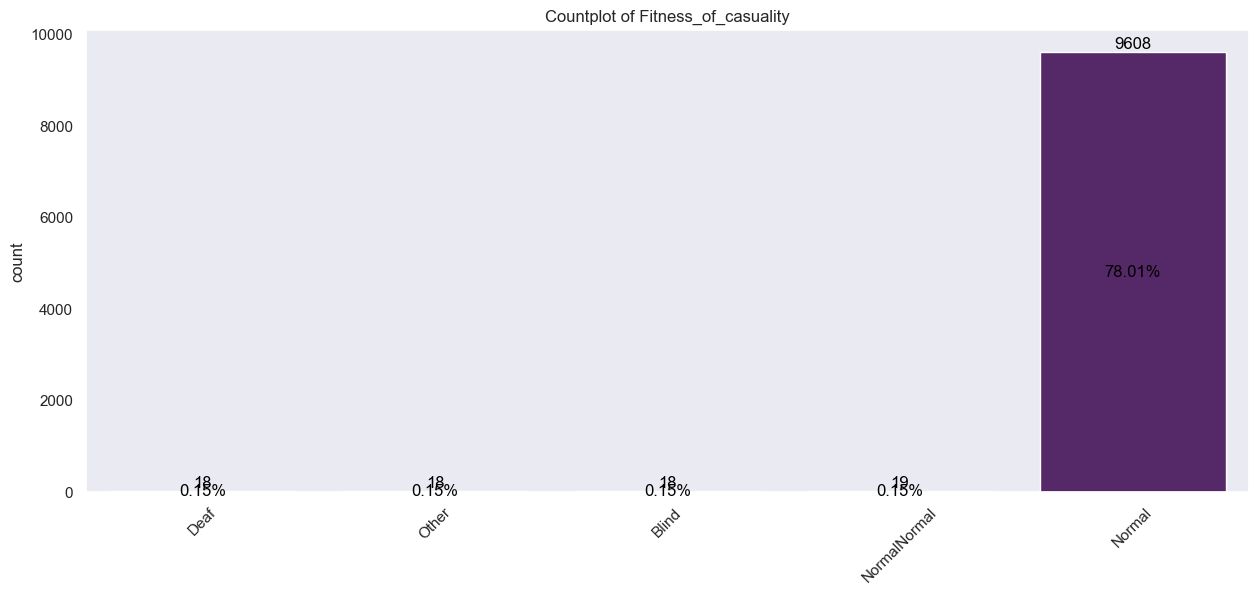

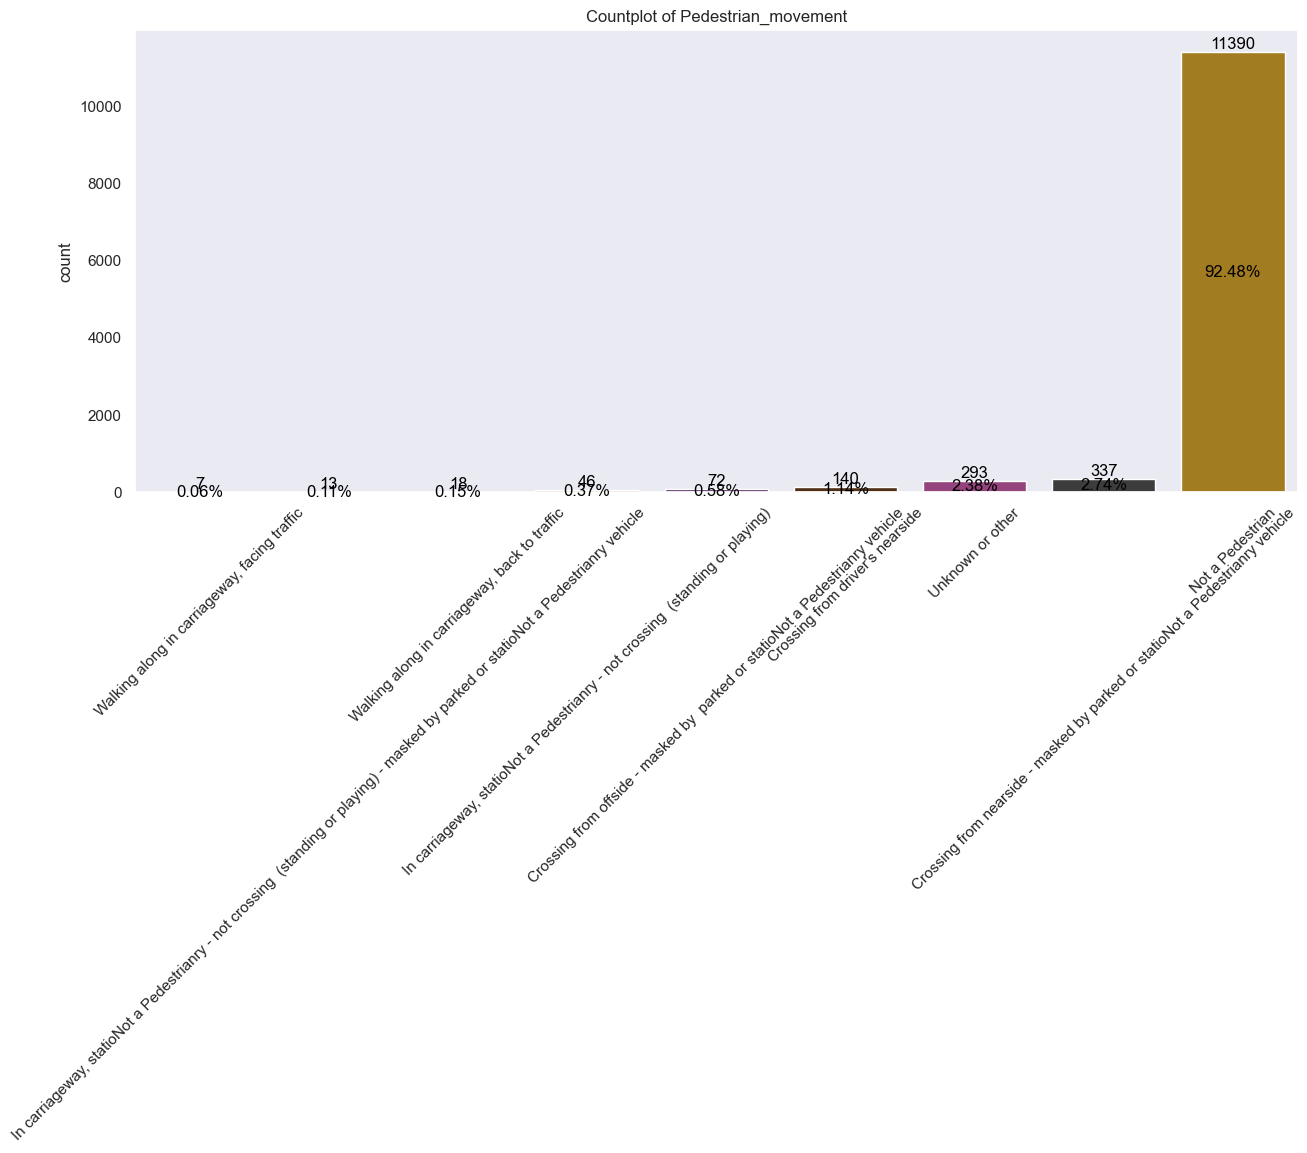

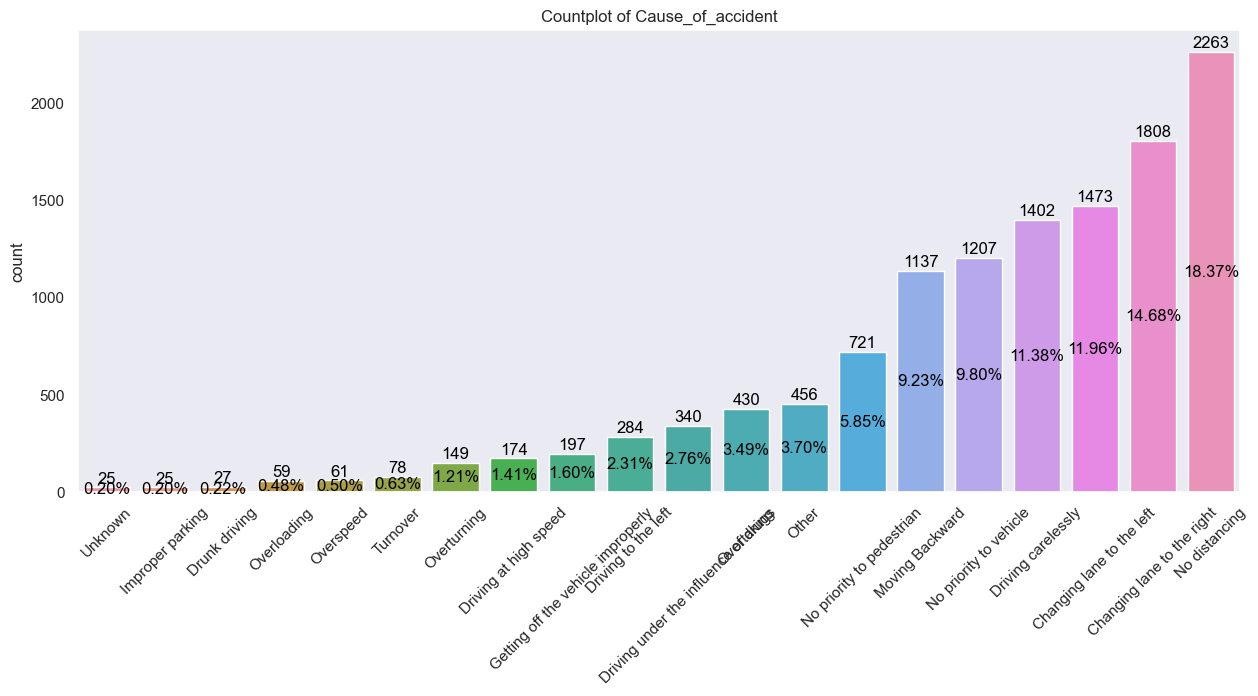

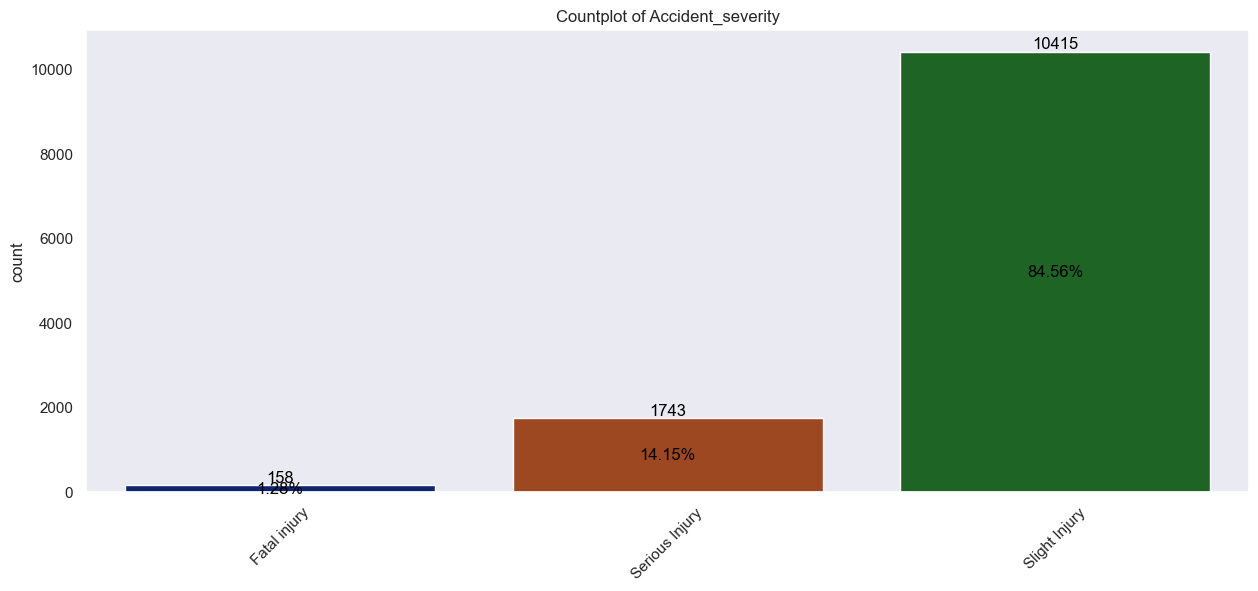

In [17]:
# Function to plot countplots of all categorical variables in an ascending order of count of each unique variable with unique values less than or equal to the argument unique_value_limit 
def plot_categorical_countplots(dataframe, unique_value_limit=0):
    categorical_columns = dataframe.select_dtypes(include=['object'])

    for column in categorical_columns.columns:
        unique_count = len(dataframe[column].unique())
        if unique_count <= unique_value_limit:
            plt.figure(figsize=(15, 6))
            ax = sns.countplot(data=dataframe, x=column,order= df[column].value_counts(ascending=True).index)
            plt.xticks(rotation=45)
            plt.title(f'Countplot of {column}')
            plt.xlabel('')

            total_count = len(dataframe[column])
            
            # Add text annotations for the count at the top and percentage in the middle of each bar
            for p in ax.patches:
                height = p.get_height()
                height = int(height)
                percentage = (height / total_count) * 100
                x = p.get_x() + p.get_width() / 2.
                y_top = height + 5  # Adjust the vertical position for the count
                y_middle = height / 2
                ax.annotate(f'{height}', 
                            (x, y_top),
                            ha='center', va='bottom', fontsize=12, color='black')
                ax.annotate(f'{percentage:.2f}%', 
                            (x, y_middle),
                            ha='center', va='center', fontsize=12, color='black')

            plt.show()


plot_categorical_countplots(df, unique_value_limit=20)